# План
1. Границы на котике
2. Дескрипторы (HOG) на цифрах

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [15]:
image = cv2.imread("maxresdefault.jpg")

In [16]:
image = (image[:, :, ::-1] / 255.).astype(np.float32)

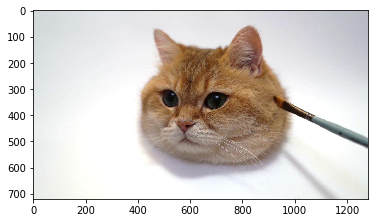

In [17]:
plt.imshow(image)

In [18]:
gx = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=1)

In [19]:
magnitude = np.sqrt(gx ** 2 + gy ** 2)

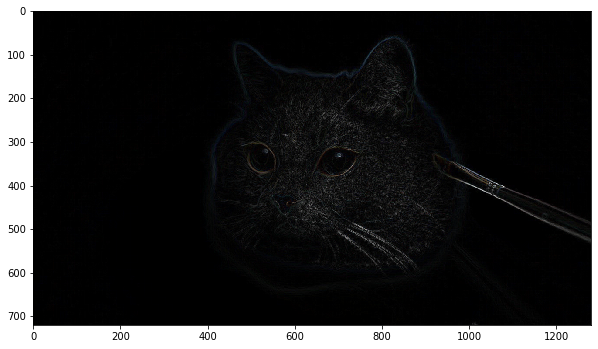

In [20]:
plt.figure(figsize=(10, 7))
plt.imshow(magnitude)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


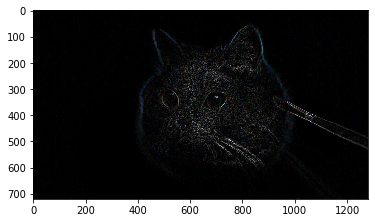

In [22]:
plt.imshow(np.abs(gx) * 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


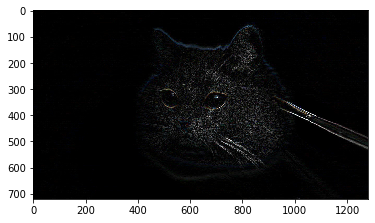

In [23]:
plt.imshow(np.abs(gy) * 2)

In [24]:
angle = np.arctan2(gy, gx)

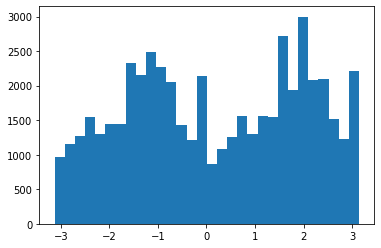

In [28]:
plt.hist(angle.reshape(-1), weights=magnitude.reshape(-1), bins=30);

In [29]:
angle = angle.reshape(-1)

In [30]:
angle[angle < 0] += np.pi

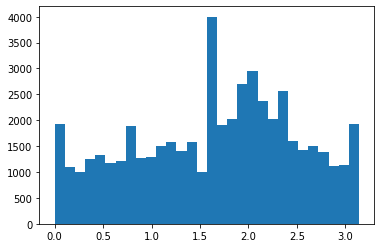

In [31]:
plt.hist(angle, weights=magnitude.reshape(-1), bins=30);

# HOG classifier

In [32]:
from sklearn.datasets import load_digits

In [33]:
digits = load_digits()

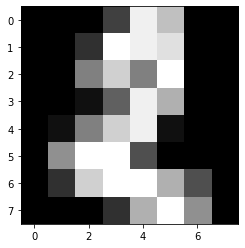

In [192]:
plt.imshow(digits['images'][2], cmap='gray')

In [193]:
digits['images'][2].shape

(8, 8)

In [194]:
BINS = 16

In [195]:
def compute_hog(digit, bins=20):
    gx = cv2.Sobel(digit, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(digit, cv2.CV_32F, 0, 1, ksize=1)
    
    magnitude = np.sqrt(gx ** 2 + gy ** 2)
    angle = np.arctan2(gy, gx)
    angle[angle < 0] += np.pi
    
    hog, _ = np.histogram(angle, bins=bins, weights=magnitude, density=True)
    return hog

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(digits['images'], digits['target'], test_size=0.2)

In [198]:
centroids = np.zeros((10, BINS))
images_in_class = [0] * 10

In [199]:
for image, label in zip(X_train, y_train):
    centroids[label] += compute_hog((image / 16.).astype(np.float32), bins=BINS)
    images_in_class[label] += 1

In [200]:
centroids = centroids / np.array(images_in_class)[:, None]

In [201]:
predictions = []

In [202]:
for image in X_test:
    hog = compute_hog((image / 16.).astype(np.float32), BINS)
    distance_to_centroid = np.linalg.norm(centroids - hog, axis=1)
    predictions.append(np.argmin(distance_to_centroid))

In [203]:
from sklearn.metrics import accuracy_score

In [204]:
accuracy_score(predictions, y_test)

0.5166666666666667